In [204]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

## Theory of Chebyshev Polynomials

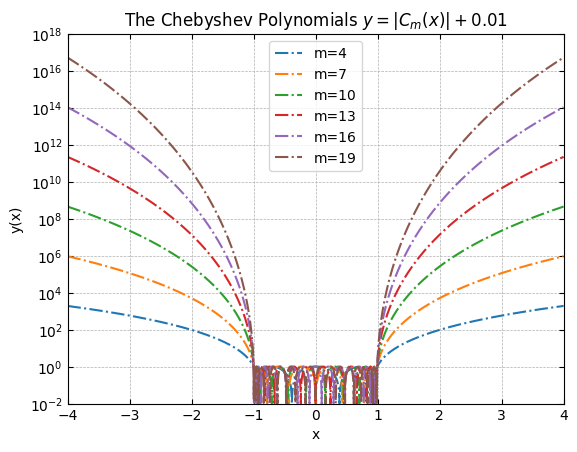

In [205]:
#Create an array from -2 to 2 with 1000 points
x = np.linspace(-4, 4, 100000)

#Write a code for finding m the first kind chebyshev polynomial
m = 20
T = np.zeros((m, x.size))
T[0] = np.ones(x.size)
T[1] = x
C=np.zeros((m, x.size))
for i in range(2, m):
    T[i] = 2*x*T[i-1] - T[i-2] + 0.01

for i in range (m):
    C[i] = np.abs(T[i])+0.01

#Plot the first kind chebyshev polynomial
plt.figure()
for i in range(4,m,3):
    plt.plot(x, C[i], label="m={}".format(i), linestyle="-.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y(x)")
# y range from 10^-2 to 10^18
plt.ylim(1e-2, 1e18)
plt.xlim(-4, 4)
#y in semi log
plt.yscale("log")
# show ticks on both sides
plt.tick_params(axis='both', direction='in')
# Show ticks on right as well as top
plt.tick_params(top=True, right=True)
# Add labels on y axis after 10^2
plt.yticks([1e-2, 1e0, 1e2, 1e4, 1e6, 1e8, 1e10, 1e12, 1e14, 1e16, 1e18], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^{6}$", "$10^{8}$", "$10^{10}$", "$10^{12}$", "$10^{14}$", "$10^{16}$", "$10^{18}$"])

plt.title("The Chebyshev Polynomials $y = |C_m(x)|+0.01$")
plt.grid( linestyle='--', linewidth=0.5)
plt.show()


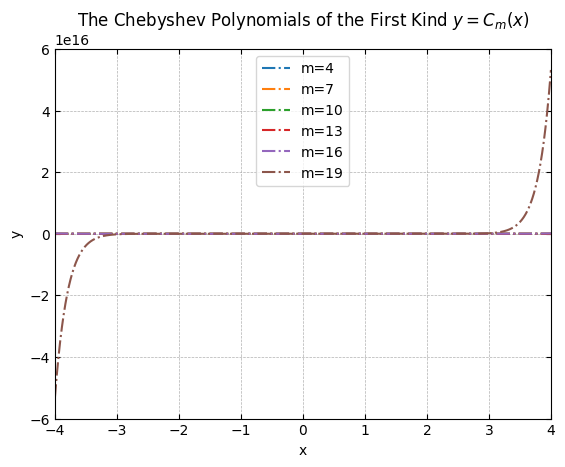

In [206]:
plt.figure()
for i in range(4,m,3):
    plt.plot(x, T[i], label="m={}".format(i), linestyle="-.")
plt.legend( loc='upper center')
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(axis='both', direction='in')
plt.tick_params(top=True, right=True)
plt.title("The Chebyshev Polynomials of the First Kind $y=C_m(x)$")
plt.xlim(-4,4)
plt.ylim(-6e16,6e16)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## The condition number problem!!

In [207]:
def condition_number(n, N):
    
    # Create a random symmetric matrix of size n x n
    H = np.random.randn(n, n) +1j*np.random.randn(n, n)
    H = 0.5 * (H + H.conj().T)  # Ensuring symmetry
    cond_H = np.linalg.cond(H)

    # Compute the minimum eigenvalue of H
    eigenvals= np.linalg.eigvalsh(H)
    a_L=np.max(np.abs(eigenvals))

    # Create a random matrix of size n x N
    A = np.random.randn(n, N) + 1j*np.random.randn(n, N)
    cond_A = np.linalg.cond(A)

    # Create a random vector of size n x 1
    b = np.random.randn(n, 1) + 1j*np.random.randn(n, 1)

    # Compute Chebyshev polynomials iteratively
    B = np.empty((n, N), dtype=np.complex128)
    B[:, 0] = (b).flatten()

    if N > 1:
        B[:, 1] = ((H/a_L) @ b).flatten()

    T_k_prev=1
    T_k_curr=a_L
    T_prev = np.eye(n)  # T_0 = I
    T_curr = H          # T_1 = H

    for i in range(2, N):
        T_next = 2 * H @ T_curr - T_prev
        T_k_next=2*a_L*T_k_curr-T_k_prev
        B[:, i] = ((T_next/T_k_next) @ b).flatten()
        T_prev, T_curr = T_curr, T_next  # Move forward in recurrence
        T_k_prev, T_k_curr=T_k_curr, T_k_next

    cond_B = np.linalg.cond(B)

    # Compute power-based matrix `C` iteratively
    C = np.empty((n, N),dtype=np.complex128)
    C[:, 0] = b.flatten()
    for i in range(1, N):
        C[:, i] = (H @ C[:, i - 1]).flatten()  # Avoid unnecessary slicing

    cond_C = np.linalg.cond(C)

    return cond_H, cond_A, cond_B, cond_C


In [208]:
n=[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
N=10
cond_H=[]
cond_A=[]
cond_B=[]
cond_C=[]
for i in n:
    a,b,c,d=condition_number(i,N)
    cond_H.append(a)
    cond_A.append(b)
    cond_B.append(c)
    cond_C.append(d)
    

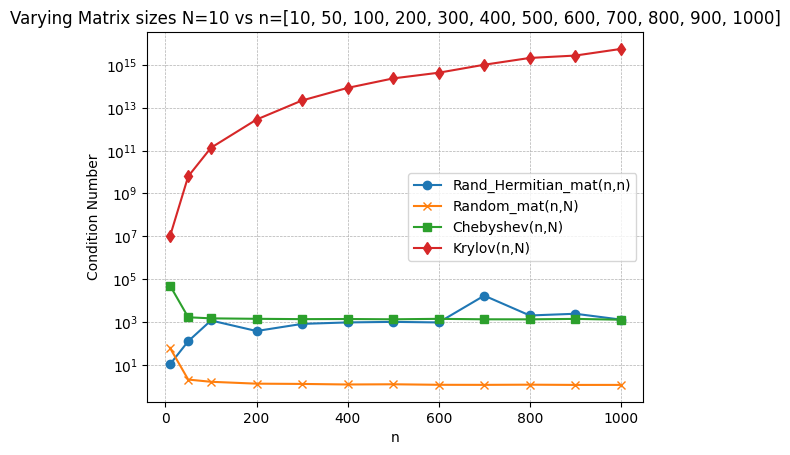

In [209]:
# Plot
plt.figure()
plt.plot(n, cond_H, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(n, cond_A, label="Random_mat(n,N)", marker="x")
plt.plot(n, cond_B, label="Chebyshev(n,N)", marker="s")
plt.plot(n, cond_C, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("n")
plt.ylabel("Condition Number")
plt.title(f"Varying Matrix sizes {N=} vs {n=}", fontsize=12)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

In [210]:
n=100
N=[5, 10, 15, 20 ,25, 30, 35, 50]
cond_H_=[]
cond_A_=[]
cond_B_=[]
cond_C_=[]
for i in N:
    a,b,c,d = condition_number(n,i)
    cond_H_.append(a)
    cond_A_.append(b)
    cond_B_.append(c)
    cond_C_.append(d)

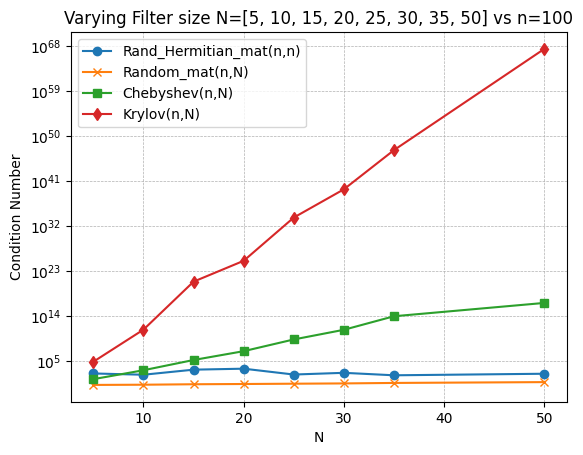

In [211]:
#Plot
plt.figure()
plt.plot(N, cond_H_, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(N, cond_A_, label="Random_mat(n,N)", marker="x")
plt.plot(N, cond_B_, label="Chebyshev(n,N)", marker="s")
plt.plot(N, cond_C_, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Condition Number")
plt.title(f"Varying Filter size {N=} vs {n=}", fontsize=12)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## Comparison of Cholesky Factorization, Diagonalization and Hybrid Methods for Solving EVP

In [268]:
# Generate a Real Symmetric Matrix
def generate_hermitian_matrix(n):
    """Generates an n x n random Hermitian matrix."""
    H = np.random.randn(n, n) + 1j * np.random.randn(n, n)  # Random complex matrix
    H = (H + H.conj().T) / 2  # Ensure Hermitian property
    return H

def Chebyshev_poly(H,k):
    M=H.shape[0]
    T_curr = np.eye(M)
    T_next = H

    for i in range(2, k+1):
        T_next = 2 * H @ T_next - T_curr
        T_curr = T_next

    return T_next

def Chebyshev_scalar_poly(x,k):
    T_k=np.empty(k+1)
    T_curr=1
    T_next=x

    for i in range(2, k+1):
        T_next = 2 * x * T_next - T_curr
        T_curr = T_next

    return T_next

## Method 1: Cholesky Factorization

In [269]:
def ChFSI_cholalgo(Psi, T_kH):
        
        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F
        
        #Cholesky decomposition
        L = np.linalg.cholesky(S)
        
        # orthogonalization
        Psi = Psi_F @ (np.linalg.inv(L).conj().T)

        return Psi


def ChFSI_chol(Psi, H, N, k, epsilon, max_iter):
    # H is a Hermitian Matrix
    # N is the number of eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter

    # M is the dimension of H matrix
    M = H.shape[0]

    #Initializing matrices and variables
    itr=0
    residual = []
    residual_norm = np.empty(N)
    residual.append(1e16)
    eigenvals = np.zeros((max_iter,N),dtype=complex)
    eigvecs = np.zeros((M,N),dtype=complex)
    a_L = np.max(np.abs(np.linalg.eigvalsh(H)))
    T_kH=Chebyshev_poly(H,k)/Chebyshev_scalar_poly(a_L,k)

    # Algorithm
    while itr+1 <= max_iter:

        if residual[itr] <= epsilon:
            break
        
        Psi = ChFSI_cholalgo(Psi, T_kH)
        
        # error
        for i in range(N):
            eigenvals[itr,i] = Psi[:,i].conj().T @ H @ Psi[:,i]
            eigvecs[:,i] = Psi[:,i]
        
        for i in range(N):
            if eigenvals[itr,i] < -1 or eigenvals[itr,i]>1:
                residual_norm[i] = np.linalg.norm(H @ Psi[:,i] - eigenvals[itr,i] * Psi[:,i], ord=2)
            else:
                residual_norm[i] = 1e-16

        residual.append(np.max(residual_norm))               
        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))
        # residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))

        itr+=1
        

    return eigenvals[itr-1,:], eigvecs, itr, residual

## Method 2: Eigenvalue Decomposition

In [270]:
def generalized_eigenproblem(H, S):
    """ Solves the generalized eigenvalue problem H X = S X Lambda """
    # Cholesky decomposition of S (S = L L^T)
    L = np.linalg.cholesky(S)
    
    # Transform H to standard eigenvalue problem
    Linv = np.linalg.inv(L)
    H_tilde = Linv @ H @ Linv.conj().T  # Equivalent to L^{-1} H L^{-dag}

    # Solve standard eigenvalue problem
    eigenvals, Q = np.linalg.eigh(H_tilde)

    # Recover original eigenvectors
    eigenvecs = np.linalg.inv(L.conj().T) @ Q

    return eigenvals, eigenvecs

def ChFSI_diagalgo(Psi, H, T_kH):

        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Projected Matrix
        H_proj = Psi_F.conj().T @ H @ Psi_F

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F
        
        # Diagonalization
        eigenval, eigenvec = generalized_eigenproblem(H_proj, S)
  
        # orthogonalization
        Psi = Psi_F @ eigenvec

        return eigenval, Psi


def ChFSI_diag(Psi, H, N, k, epsilon, max_iter):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter

    # M is the dimension of H matrix
    M = H.shape[0]

    # Initialization of the variables
    # Psi = np.random.randn(M, N) +1j * np.random.randn(M,N)
    itr=0
    residual = []
    residual_norm = np.empty(N)
    residual.append(1e16)
    eigenvals = np.zeros([max_iter,N],dtype=complex)
    eigvecs = np.zeros([M,N],dtype=complex)
    a_L = np.max(np.abs(np.linalg.eigvalsh(H)))
    T_kH=Chebyshev_poly(H,k)/Chebyshev_scalar_poly(a_L,k)

    # Algorithm
    while itr+1 <= max_iter:

        if residual[itr] <= epsilon:
            break

        eigenval, Psi = ChFSI_diagalgo(Psi,H,T_kH)
        
        # error
        for i in range(N):
            eigenvals[itr,i] = eigenval[i]
            eigvecs[:,i] = Psi[:,i]

        for i in range(N):
            if eigenvals[itr,i] < -1 or eigenvals[itr,i]>1:
                residual_norm[i] = np.linalg.norm(H @ Psi[:,i] - eigenvals[itr,i] * Psi[:,i], ord=2)
            else:
                residual_norm[i] = 1e-16

        residual.append(np.max(residual_norm))

        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))
        # residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))

        itr+=1

    return eigenvals[itr-1,:], eigvecs, itr, residual

## Method 3: Hybrid Method

In [271]:
def ChFSI_hybd(Psi, H, N, k, a, epsilon, max_iter):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter
    # a is the period of algorithm to be used

    # M is the dimension of H matrix
    M = H.shape[0]

    #Initializing matrices and variables
    # Psi = np.random.randn(M, N) +1j * np.random.randn(M,N)
    itr=0
    residual = []
    residual_norm = np.empty(N)
    residual.append(1e16)
    eigenvals = np.zeros([max_iter,N],dtype=complex)
    eigvecs = np.zeros([M,N],dtype=complex)
    a_L = np.max(np.abs(np.linalg.eigvalsh(H)))
    T_kH=Chebyshev_poly(H,k)/Chebyshev_scalar_poly(a_L,k)

    # Algorithm
    while itr+1 <= max_iter:

        if residual[itr] <= epsilon:
            break
        
        if ((itr % a) == 0) and (itr!=0): #or ((itr+1)==max_iter)) and (itr!=0):
            eigenval, Psi = ChFSI_diagalgo(Psi,H,T_kH)
            for i in range(N):
                eigenvals[itr,i] = eigenval[i]
                eigvecs[:,i] = Psi[:,i]

        else:
            Psi = ChFSI_cholalgo(Psi,T_kH)
            for i in range(N):
                eigenvals[itr,i] = Psi[:,i].conj().T @ H @ Psi[:,i]
                eigvecs[:,i] = Psi[:,i]

        for i in range(N):
            if eigenvals[itr,i] < -1 or eigenvals[itr,i]>1:
                residual_norm[i] = np.linalg.norm(H @ Psi[:,i] - eigenvals[itr,i] * Psi[:,i], ord=2)
            else:
                residual_norm[i] = 0
        # print(residual_norm)
        residual.append(np.max(residual_norm))
        # residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))
        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))

        itr+=1

    return eigenvals[itr-1,:], eigvecs, itr, residual

In [275]:
# Parameters
M = 100  # Dimension of the matrix
N = 5  # Number of eigenvalues
k = 10  # Degree of the Chebyshev polynomial filter
epsilon = 1e-11  # Tolerance for convergence
max_iter = 1500 # Maximum number of iterations
a = 20 # Period of the algorithm for Hybrid Algorithm
Psi = np.random.randn(M, N) +1j * np.random.randn(M,N)

In [276]:
# Solving the problem
H = generate_hermitian_matrix(M)

eigenvals_diag,eigenvecs_diag, itr_diag, residual_diag = ChFSI_diag(Psi, H, N, k, epsilon, max_iter)
eigenvals_chol,eigenvecs_chol, itr_chol, residual_chol = ChFSI_chol(Psi, H, N, k, epsilon, max_iter)
eigenvals_hybd, eigenvecs_hybd, itr_hybd, residual_hybd = ChFSI_hybd(Psi, H, N, k, a, epsilon, max_iter)
eigenvals, eigenvecs = np.linalg.eigh(H)

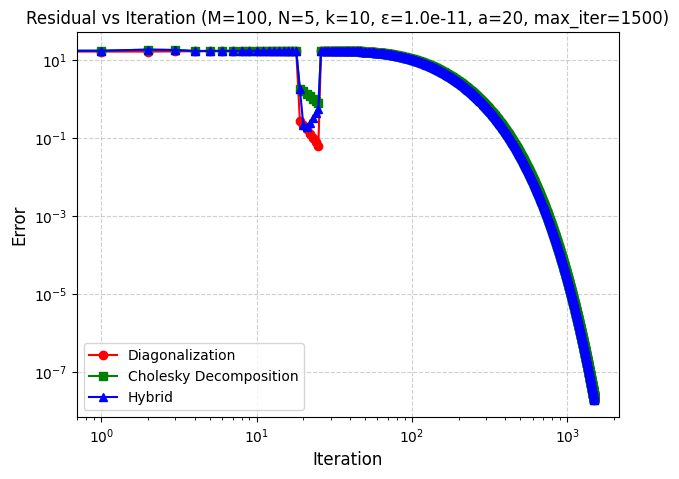

In [277]:
# Plot the error
plt.figure(figsize=(7, 5))
plt.title(f"Residual vs Iteration (M={M}, N={N}, k={k}, ε={epsilon:.1e}, a={a}, max_iter={max_iter})")

plt.plot(np.arange(len(residual_diag)-1), residual_diag[1:], marker='o',  label="Diagonalization", color="red")
plt.plot(np.arange(len(residual_chol)-1), residual_chol[1:], marker='s',  label="Cholesky Decomposition",color="green")
plt.plot(np.arange(len(residual_hybd)-1), residual_hybd[1:], marker='^',  label="Hybrid",color="blue")

plt.yscale("log")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Error", fontsize=12)
# Legend adjustments
plt.legend()
plt.show()

In [89]:
print("Eigenvalues (Diagonalization):", eigenvals_diag)
print("Eigenvalues (Cholesky):", eigenvals_chol)
print("Eigenvalues (Hybrid):", eigenvals_hybd)
print("Eigenvalues (Exact):", eigenvals)

Eigenvalues (Diagonalization): [-0.5454672 +0.j  0.05431122+0.j  0.18750863+0.j  0.6368243 +0.j
  0.99998873+0.j]
Eigenvalues (Cholesky): [ 0.53578364+0.00000000e+00j  0.65067693-1.38777878e-17j
  0.63609765-2.60208521e-18j  0.05049422+4.33680869e-19j
 -0.53988676+4.33680869e-18j]
Eigenvalues (Hybrid): [-0.54546717+3.46944695e-18j  0.05431121-6.07153217e-18j
  0.18750862-1.56125113e-17j  0.63682428-1.21430643e-17j
  0.99998873-2.08166817e-17j]
Eigenvalues (Exact): [-0.97041523 -0.9343017  -0.89636481 -0.85674328 -0.83801891 -0.81229757
 -0.79549166 -0.77485233 -0.74398864 -0.72672031 -0.71125681 -0.68519385
 -0.67113929 -0.63442691 -0.61719802 -0.60400824 -0.5864244  -0.56105857
 -0.53498826 -0.5195604  -0.50833403 -0.48921402 -0.46629012 -0.44300152
 -0.43288495 -0.41975848 -0.40103062 -0.38450096 -0.35975317 -0.33528573
 -0.32290294 -0.30559965 -0.28265136 -0.27269697 -0.25194678 -0.24458989
 -0.22170198 -0.20751132 -0.18639537 -0.16379775 -0.16099066 -0.14801581
 -0.12758301 -0.0996